#**Importing Necessary libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Preparing the data named IMDB**

In [2]:
df = pd.read_csv('/workspace/data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
classes = ['Hate Speech','Offensive Language','None']

In [4]:
df.drop(['count','hate_speech','offensive_language','neither','Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df.shape

(24783, 2)

#**Statistics of the Data**

Hate Speech  :  1430
Offensive Language  :  19190
None  :  4163


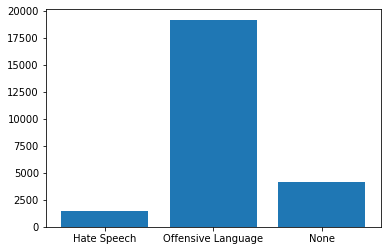

In [7]:
labels = df['class']
unique, counts = np.unique(labels, return_counts=True)
values = list(zip(unique, counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ',i[1])
plt.show()

In [8]:
hate_tweets = df[df['class']==0]
offensive_tweets = df[df['class']==1]
neither = df[df['class']==2]
print(hate_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(1430, 2)
(19190, 2)
(4163, 2)


In [9]:
for i in range(3):
    hate_tweets = pd.concat([hate_tweets,hate_tweets],ignore_index = True)
neither = pd.concat([neither,neither,neither], ignore_index = True)
offensive_tweets = offensive_tweets.iloc[0:12000,:]
print(hate_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(11440, 2)
(12000, 2)
(12489, 2)


In [10]:
df = pd.concat([hate_tweets,offensive_tweets,neither],ignore_index = True)
df.shape

(35929, 2)

Hate Speech  :  11440
Offensive Language  :  12000
None  :  12489


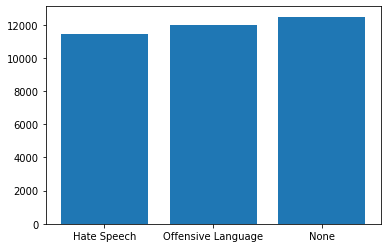

In [11]:
labels = df['class']
unique, counts = np.unique(labels, return_counts=True)
values = list(zip(unique, counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ',i[1])
plt.show()

In [12]:
df.head()

,class,tweet
0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
1,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
2,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
3,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
4,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


#**Preprocessing**

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# dealing with Slangs
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food', 'u': 'you', 
     'ur':'your', 'bday' : 'birthday', 'bihday' : 'birthday'}

In [15]:
stop_words = set(stopwords.words("english"))
stop_words.add('rt')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()
giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
mention_regex = '@[\w\-]+'

def clean_text(text):
    text = re.sub('"', "", text)
    text = re.sub(mention_regex, ' ',text) #removing all user names
    text = re.sub(giant_url_regex, ' ', text)  #remocing the urls
    text = text.lower()
    text = re.sub("hm+", "", text) #removing variants of hmmm
    text = re.sub("[^a-z]+", " ", text) #removing all numbers, special chars like @,#,? etc
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = [d[word] if word in d else word for word in text]  #replacing some slangs
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

In [18]:
import nltk
df['processed_tweets'] = df.tweet.apply(lambda x: clean_text(x))   # df.review.map(clean_text) Also can be used
df.head()

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
x = df.processed_tweets
y = df['class']
print(x.shape)
print(y.shape)

In [ ]:
# finding unique words
word_unique = []
for i in x:
    for j in i.split():
        word_unique.append(j)
unique, counts = np.unique(word_unique, return_counts=True)
print("The total words in the tweets are : ", len(word_unique))
print("The total UNIQUE words in the tweets are : ", len(unique))

In [ ]:
# finding length of tweets
tweets_length = []
for i in x:
    tweets_length.append(len(i.split()))
print("The Average Length tweets are : ",np.mean(tweets_length))
print("The max length of tweets is : ", np.max(tweets_length))
print("The min length of tweets is : ", np.min(tweets_length))

In [ ]:
tweets_length = pd.DataFrame(tweets_length)
# tweets_length.describe()

In [ ]:
#Sorting the Unique words based on their Frequency
col = list(zip(unique, counts))
col = sorted(col, key = lambda x: x[1],reverse=True)
col=pd.DataFrame(col)
print("Top 20 Occuring Words with their frequency are:")
col.iloc[:20,:]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features = 8000 )
# tokenize and build vocab

vectorizer.fit(x)
# summarize

print(len(vectorizer.vocabulary_))
print(vectorizer.idf_.shape)

In [ ]:
x_tfidf = vectorizer.transform(x).toarray()
print(x_tfidf.shape)

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words = 8000
embed_dim = 32
tokenizer = Tokenizer(num_words=num_words,oov_token = "<oov>" )
tokenizer.fit_on_texts(x)
word_index=tokenizer.word_index
sequences = tokenizer.texts_to_sequences(x)
length=[]
for i in sequences:
    length.append(len(i))
print(len(length))
print("Mean is: ",np.mean(length))
print("Max is: ",np.max(length))
print("Min is: ",np.min(length))

In [17]:
pad_length = 24
sequences = pad_sequences(sequences, maxlen = pad_length, truncating = 'pre', padding = 'post')
sequences.shape

NameError: name 'pad_sequences' is not defined

#**Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sequences,y,test_size = 0.05)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34132, 24)
(1797, 24)
(34132,)
(1797,)


#**RNN Model**

In [ ]:
from keras.layers import Dense, Embedding, Dropout , Activation, Flatten, SimpleRNN
from keras.layers import GlobalMaxPool1D
from keras.models import Model, Sequential
import tensorflow as tf

In [ ]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model = Sequential([Embedding(num_words, embed_dim, input_length = pad_length),
                   SimpleRNN(8, return_sequences = True),
                   GlobalMaxPool1D(),
                   Dense(20,activation = 'relu',kernel_initializer='he_uniform'),
                   Dropout(0.25),
                   Dense(3,activation = 'softmax')])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.name = 'Twitter Hate Text Classification'
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 24, 32)            256000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 24, 8)             328       
                                                                 
 global_max_pooling1d_1 (Glo  (None, 8)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 20)                180       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 63        
                                                      

#**Training the Model**

In [ ]:
history = model.fit(x = x_train, y = y_train, epochs = 5,validation_split = 0.05)

Epoch 1/5
1014/1014 [==============================] - 12s 12ms/step - loss: 0.2029 - accuracy: 0.9373 - val_loss: 0.1583 - val_accuracy: 0.9473
Epoch 2/5
1014/1014 [==============================] - 11s 11ms/step - loss: 0.1271 - accuracy: 0.9624 - val_loss: 0.1521 - val_accuracy: 0.9467
Epoch 3/5
1014/1014 [==============================] - 12s 11ms/step - loss: 0.0906 - accuracy: 0.9754 - val_loss: 0.1479 - val_accuracy: 0.9537
Epoch 4/5
1014/1014 [==============================] - 12s 12ms/step - loss: 0.0714 - accuracy: 0.9801 - val_loss: 0.1644 - val_accuracy: 0.9525
Epoch 5/5
1014/1014 [==============================] - 12s 12ms/step - loss: 0.0588 - accuracy: 0.9839 - val_loss: 0.1541 - val_accuracy: 0.9584


#**Evaluation**

In [ ]:
evaluate = model.evaluate(x_test,y_test)

57/57 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.9688


In [ ]:
print("Test Acuracy is : {:.2f} %".format(evaluate[1]*100))
print("Test Loss is : {:.4f}".format(evaluate[0]))

Test Acuracy is : 96.88 %
Test Loss is : 0.1112


In [ ]:
predictions = model.predict(x_test)

57/57 [==============================] - 0s 2ms/step


In [ ]:
predict = []
for i in predictions:
    predict.append(np.argmax(i))

# **Confusion Matrix**

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(predict,y_test)
acc = metrics.accuracy_score(predict,y_test)

In [ ]:
print("The Confusion matrix is: \n",cm)

The Confusion matrix is: 
 [[548  22   1]
 [  6 572   8]
 [  0  19 621]]


#**Accuracy**

In [ ]:
print(acc*100)

96.88369504730106


#**Classification Report**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       554
           1       0.98      0.93      0.95       613
           2       0.97      0.99      0.98       630

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797



#**LSTM**

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(num_words, EMBED_DIM, input_length = pad_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 24, 32)            256000    
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 281,027
Trainable params: 281,027
Non-trainable params: 0
_________________________________________________________________
None


#**Training Model**

In [ ]:
history = model.fit(x = x_train, y = y_train, epochs = 10,validation_split = 0.05)

Epoch 1/10
1014/1014 [==============================] - 26s 24ms/step - loss: 0.4328 - accuracy: 0.8246 - val_loss: 0.2531 - val_accuracy: 0.9127
Epoch 2/10
1014/1014 [==============================] - 22s 22ms/step - loss: 0.1874 - accuracy: 0.9405 - val_loss: 0.1876 - val_accuracy: 0.9367
Epoch 3/10
1014/1014 [==============================] - 23s 23ms/step - loss: 0.1426 - accuracy: 0.9554 - val_loss: 0.1991 - val_accuracy: 0.9391
Epoch 4/10
1014/1014 [==============================] - 24s 23ms/step - loss: 0.1188 - accuracy: 0.9626 - val_loss: 0.1991 - val_accuracy: 0.9361
Epoch 5/10
1014/1014 [==============================] - 23s 23ms/step - loss: 0.0999 - accuracy: 0.9688 - val_loss: 0.2142 - val_accuracy: 0.9408
Epoch 6/10
1014/1014 [==============================] - 23s 22ms/step - loss: 0.0835 - accuracy: 0.9730 - val_loss: 0.1820 - val_accuracy: 0.9508
Epoch 7/10
1014/1014 [==============================] - 24s 23ms/step - loss: 0.0735 - accuracy: 0.9767 - val_loss: 0.2202 -

#**Evaluation**

In [ ]:
evaluate = model.evaluate(x_test,y_test)

57/57 [==============================] - 0s 8ms/step - loss: 0.1719 - accuracy: 0.9594


In [ ]:
print("Test Acuracy is : {:.2f} %".format(evaluate[1]*100))
print("Test Loss is : {:.4f}".format(evaluate[0]))

Test Acuracy is : 95.94 %
Test Loss is : 0.1719


In [ ]:
predictions = model.predict(x_test)

57/57 [==============================] - 1s 8ms/step


In [ ]:
predict = []
for i in predictions:
    predict.append(np.argmax(i))

#**Confusion Matrix**

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(predict,y_test)
acc = metrics.accuracy_score(predict,y_test)

In [ ]:
print("The Confusion matrix is: \n",cm)

The Confusion matrix is: 
 [[552  42   1]
 [  0 543   0]
 [  2  28 629]]


#**Accuracy**

In [ ]:
print(acc*100)

95.93767390094602


#**Classification Report**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       554
           1       1.00      0.89      0.94       613
           2       0.95      1.00      0.98       630

    accuracy                           0.96      1797
   macro avg       0.96      0.96      0.96      1797
weighted avg       0.96      0.96      0.96      1797

